In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
aggregate = pd.read_csv('../outputs/aggregate.csv', index_col=0)
raw = pd.read_csv('../outputs/raw.csv', index_col=0)
nn_aggregate = pd.read_csv('../outputs/nn_aggregate.csv', index_col=0)
nn_raw = pd.read_csv('../outputs/nn_raw.csv', index_col=0)
man_aggregate = pd.read_csv('../outputs/woman_aggregate_ori.csv', index_col=0)
man_raw = pd.read_csv('../outputs/woman_raw.csv', index_col=0)
woman_aggregate = pd.read_csv('../outputs/man_aggregate.csv', index_col=0)
woman_raw = pd.read_csv('../outputs/man_raw.csv', index_col=0)

In [38]:
aggregate.columns

Index(['lr_train_AETOTAL', 'lr_test_AETOTAL', 'rf_train_AETOTAL',
       'rf_test_AETOTAL', 'rf_best_params_AETOTAL',
       'lr_train_OverweightPreoccupationTotal',
       'lr_test_OverweightPreoccupationTotal',
       'rf_train_OverweightPreoccupationTotal',
       'rf_test_OverweightPreoccupationTotal',
       'rf_best_params_OverweightPreoccupationTotal',
       'lr_train_OverweightPreoccupation3Diet',
       'lr_test_OverweightPreoccupation3Diet',
       'rf_train_OverweightPreoccupation3Diet',
       'rf_test_OverweightPreoccupation3Diet',
       'rf_best_params_OverweightPreoccupation3Diet',
       'lr_train_OverweightPreoccupation4TriedFasting',
       'lr_test_OverweightPreoccupation4TriedFasting',
       'rf_train_OverweightPreoccupation4TriedFasting',
       'rf_test_OverweightPreoccupation4TriedFasting',
       'rf_best_params_OverweightPreoccupation4TriedFasting',
       'lr_train_BIQLITotal', 'lr_test_BIQLITotal', 'rf_train_BIQLITotal',
       'rf_test_BIQLITotal', 'rf_be

In [39]:
aggregate_AETOTAL = aggregate.loc[:, ['lr_test_AETOTAL', 'rf_test_AETOTAL']]
aggregate_OverweightPreoccupationTotal = aggregate.loc[:, ['lr_test_OverweightPreoccupationTotal', 'rf_test_OverweightPreoccupationTotal']]
aggregate_OverweightPreoccupation3Diet = aggregate.loc[:, ['lr_test_OverweightPreoccupation3Diet', 'rf_test_OverweightPreoccupation3Diet']]
aggregate_OverweightPreoccupation4Fasting = aggregate.loc[:, ['lr_test_OverweightPreoccupation4TriedFasting', 'rf_test_OverweightPreoccupation4TriedFasting']]
aggregate_BITLITotal = aggregate.loc[:, ['lr_test_OverweightPreoccupation4TriedFasting', 'rf_test_OverweightPreoccupation4TriedFasting']]
aggregate_BITLITotal = aggregate.loc[:, ['lr_test_BIQLITotal', 'rf_test_BIQLITotal']]

In [40]:
aggregate_AETOTAL['Label'] = 'AETOTAL'
aggregate_OverweightPreoccupationTotal['Label'] = 'OPTotal'
aggregate_OverweightPreoccupation3Diet['Label'] = 'OPDiet'
aggregate_OverweightPreoccupation4Fasting['Label'] = 'OPFasting'
aggregate_BITLITotal['Label'] = 'BIQLITotal'

In [41]:
aggregate_OverweightPreoccupation3Diet

,lr_test_OverweightPreoccupation3Diet,rf_test_OverweightPreoccupation3Diet,Label
0,0.294121,0.281932,OPDiet
1,0.293033,0.331972,OPDiet
2,0.297747,0.307891,OPDiet
3,0.313442,0.266175,OPDiet
4,0.265198,0.325677,OPDiet
5,0.263221,0.344226,OPDiet
6,0.296443,0.350600,OPDiet
7,0.238906,0.344547,OPDiet
8,0.271264,0.326364,OPDiet
9,0.278447,0.303734,OPDiet


In [42]:
aggregate_AETOTAL.columns = ['Linear Regression', 'Random Forest', 'Label']
aggregate_OverweightPreoccupationTotal.columns = ['Linear Regression', 'Random Forest', 'Label']
aggregate_OverweightPreoccupation3Diet.columns = ['Linear Regression', 'Random Forest', 'Label']
aggregate_OverweightPreoccupation4Fasting.columns = ['Linear Regression', 'Random Forest', 'Label']
aggregate_BITLITotal.columns = ['Linear Regression', 'Random Forest', 'Label']

In [43]:
aggregate_AETOTAL['Neural Network'] = nn_aggregate['nn_1_test_AETOTAL']
aggregate_OverweightPreoccupationTotal['Neural Network'] = nn_aggregate['nn_1_test_OverweightPreoccupationTotal']
aggregate_OverweightPreoccupation3Diet['Neural Network'] = nn_aggregate['nn_1_test_OverweightPreoccupation3Diet']
aggregate_OverweightPreoccupation4Fasting['Neural Network'] = nn_aggregate['nn_1_test_OverweightPreoccupation4TriedFasting']
aggregate_BITLITotal['Neural Network'] = nn_aggregate['nn_1_test_BIQLITotal']

In [44]:
df_agg = pd.concat([aggregate_AETOTAL, aggregate_OverweightPreoccupationTotal, aggregate_OverweightPreoccupation3Diet,
               aggregate_OverweightPreoccupation4Fasting, aggregate_BITLITotal])

In [45]:
lr = df_agg[['Linear Regression', 'Label']]
rf = df_agg[['Random Forest', 'Label']]
nn = df_agg[['Neural Network', 'Label']]

In [46]:
lr['Model'] = 'Linear Regression'
rf['Model'] = 'Random Forest'
nn['Model'] = 'Neural Network'

/anaconda/envs/g/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/g/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/g/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [47]:
lr.columns = ['Adj. R^2', 'Label', 'Model']
rf.columns = ['Adj. R^2', 'Label', 'Model']
nn.columns = ['Adj. R^2', 'Label', 'Model']

In [48]:
df_agg_all = pd.concat([lr, rf, nn], axis=0)

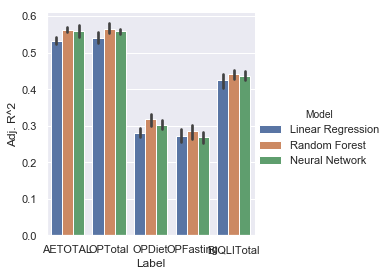

In [49]:
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(20,16)})
g = sns.catplot(x="Label", y="Adj. R^2", hue="Model", data=df_agg_all, kind="bar", height=4.)

In [50]:
df_agg_all.loc[df_agg_all['Label']=='OPTotal',:]

,Adj. R^2,Label,Model
0,0.571406,OPTotal,Linear Regression
1,0.583692,OPTotal,Linear Regression
2,0.543707,OPTotal,Linear Regression
3,0.523094,OPTotal,Linear Regression
4,0.519122,OPTotal,Linear Regression
5,0.538337,OPTotal,Linear Regression
6,0.523368,OPTotal,Linear Regression
7,0.561217,OPTotal,Linear Regression
8,0.520805,OPTotal,Linear Regression
9,0.509785,OPTotal,Linear Regression


/anaconda/envs/g/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/g/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/g/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

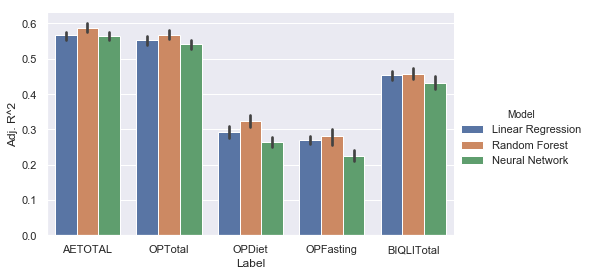

In [51]:
raw_AETOTAL = raw.loc[:, ['lr_test_AETOTAL', 'rf_test_AETOTAL']]
raw_OverweightPreoccupationTotal = raw.loc[:, ['lr_test_OverweightPreoccupationTotal', 'rf_test_OverweightPreoccupationTotal']]
raw_OverweightPreoccupation3Diet = raw.loc[:, ['lr_test_OverweightPreoccupation3Diet', 'rf_test_OverweightPreoccupation3Diet']]
raw_OverweightPreoccupation4Fasting = raw.loc[:, ['lr_test_OverweightPreoccupation4TriedFasting', 'rf_test_OverweightPreoccupation4TriedFasting']]
raw_BITLITotal = raw.loc[:, ['lr_test_OverweightPreoccupation4TriedFasting', 'rf_test_OverweightPreoccupation4TriedFasting']]
raw_BITLITotal = raw.loc[:, ['lr_test_BIQLITotal', 'rf_test_BIQLITotal']]

raw_AETOTAL['Label'] = 'AETOTAL'
raw_OverweightPreoccupationTotal['Label'] = 'OPTotal'
raw_OverweightPreoccupation3Diet['Label'] = 'OPDiet'
raw_OverweightPreoccupation4Fasting['Label'] = 'OPFasting'
raw_BITLITotal['Label'] = 'BIQLITotal'

raw_AETOTAL.columns = ['Linear Regression', 'Random Forest', 'Label']
raw_OverweightPreoccupationTotal.columns = ['Linear Regression', 'Random Forest', 'Label']
raw_OverweightPreoccupation3Diet.columns = ['Linear Regression', 'Random Forest', 'Label']
raw_OverweightPreoccupation4Fasting.columns = ['Linear Regression', 'Random Forest', 'Label']
raw_BITLITotal.columns = ['Linear Regression', 'Random Forest', 'Label']

raw_AETOTAL['Neural Network'] = nn_raw['nn_1_test_AETOTAL']
raw_OverweightPreoccupationTotal['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupationTotal']
raw_OverweightPreoccupation3Diet['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupation3Diet']
raw_OverweightPreoccupation4Fasting['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupation4TriedFasting']
raw_BITLITotal['Neural Network'] = nn_raw['nn_1_test_BIQLITotal']

df_raw = pd.concat([raw_AETOTAL, raw_OverweightPreoccupationTotal, raw_OverweightPreoccupation3Diet,
               raw_OverweightPreoccupation4Fasting, raw_BITLITotal])


lr = df_raw[['Linear Regression', 'Label']]
rf = df_raw[['Random Forest', 'Label']]
nn = df_raw[['Neural Network', 'Label']]

lr['Model'] = 'Linear Regression'
rf['Model'] = 'Random Forest'
nn['Model'] = 'Neural Network'

lr.columns = ['Adj. R^2', 'Label', 'Model']
rf.columns = ['Adj. R^2', 'Label', 'Model']
nn.columns = ['Adj. R^2', 'Label', 'Model']

df_raw_all = pd.concat([lr, rf, nn], axis=0)

g = sns.catplot(x="Label", y="Adj. R^2", hue="Model", data=df_raw_all, kind="bar", height=4., aspect=20/12)

In [52]:
df_raw_all['Data'] = 'raw'
df_agg_all['Data'] = 'aggregate'

In [53]:
df_raw_all.head()

,Adj. R^2,Label,Model,Data
0,0.583650,AETOTAL,Linear Regression,raw
1,0.574011,AETOTAL,Linear Regression,raw
2,0.518898,AETOTAL,Linear Regression,raw
3,0.542727,AETOTAL,Linear Regression,raw
4,0.570136,AETOTAL,Linear Regression,raw


In [54]:
np.mean(df_agg_all.loc[(df_agg_all['Model']=='Linear Regression') & (df_agg_all['Label']=='BILITotal'), 'Adj. R^2'])

nan

In [55]:
np.mean(df_raw_all.loc[(df_raw_all['Model']=='Linear Regression') & (df_raw_all['Label']=='BILITotal'), 'Adj. R^2'])

nan

In [56]:
df_raw_all.head()

,Adj. R^2,Label,Model,Data
0,0.583650,AETOTAL,Linear Regression,raw
1,0.574011,AETOTAL,Linear Regression,raw
2,0.518898,AETOTAL,Linear Regression,raw
3,0.542727,AETOTAL,Linear Regression,raw
4,0.570136,AETOTAL,Linear Regression,raw


In [57]:
df_all = pd.concat([df_raw_all, df_agg_all])

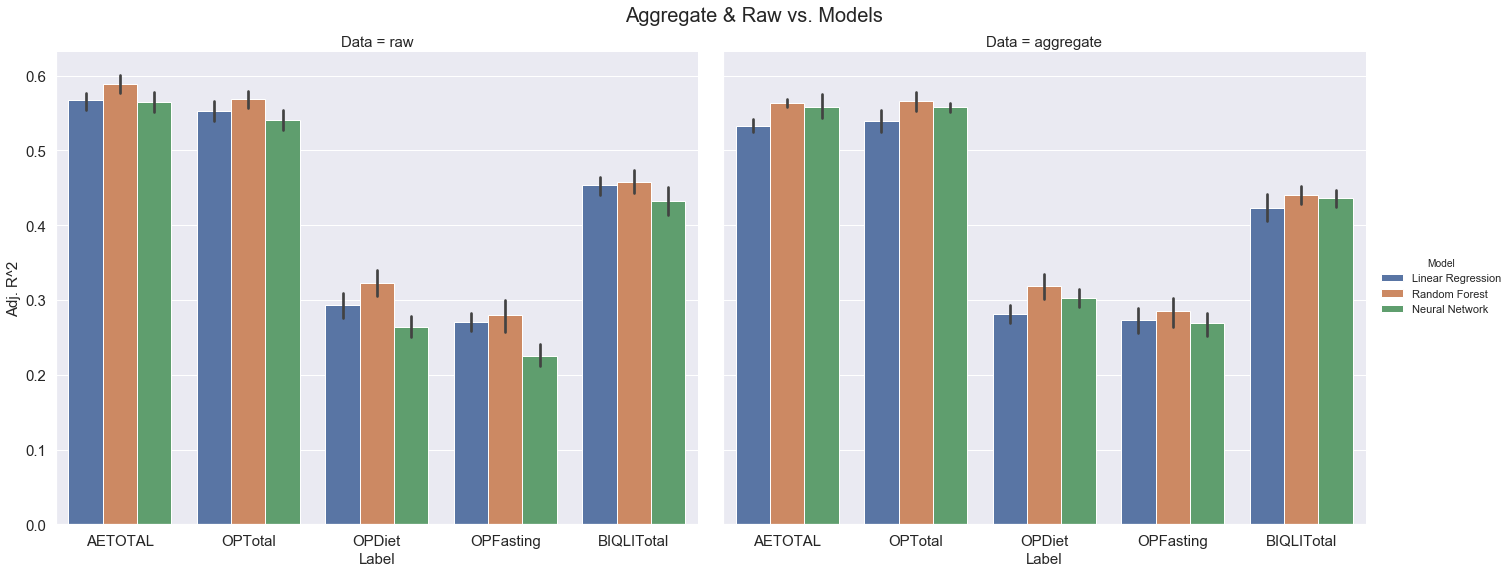

In [58]:
g = sns.catplot(x="Label", y="Adj. R^2", hue="Model", col='Data', data=df_all, kind="bar", height=8., aspect=6/5)
ax1 = g.axes[0,0]
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)

ax2 = g.axes[0,1]
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(15)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Aggregate & Raw vs. Models', fontsize=20)

g.savefig('agg_raw_models.svg')

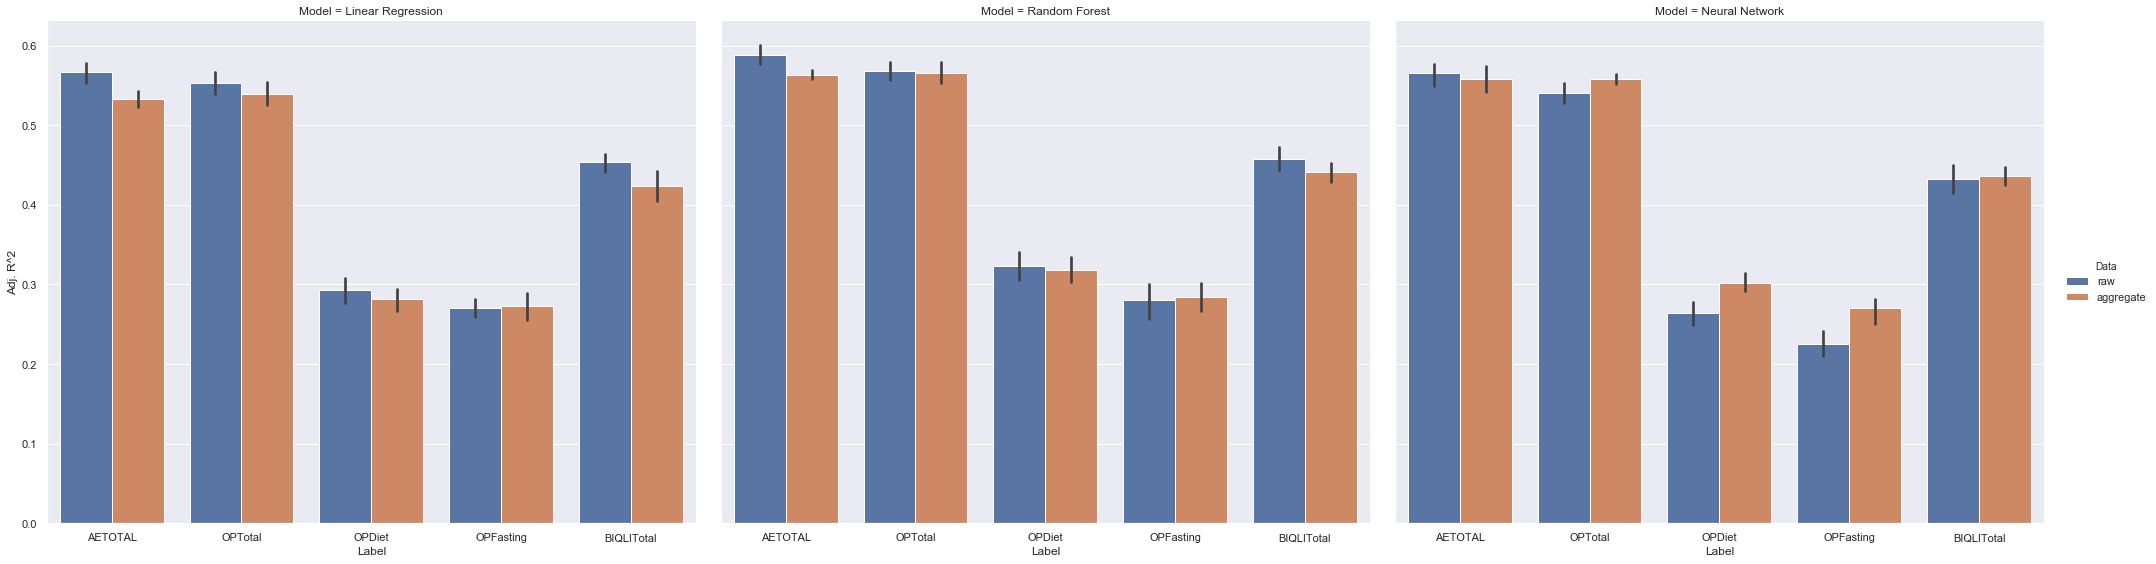

In [59]:
g = sns.catplot(x="Label", y="Adj. R^2", hue="Data", col='Model', data=df_all, kind="bar", height=8., aspect=6/5)



In [60]:
man_AETOTAL = man_aggregate.loc[:, ['lr_test_AETOTAL', 'rf_test_AETOTAL']]
man_OverweightPreoccupationTotal = man_aggregate.loc[:, ['lr_test_OverweightPreoccupationTotal', 'rf_test_OverweightPreoccupationTotal']]
man_OverweightPreoccupation3Diet = man_aggregate.loc[:, ['lr_test_OverweightPreoccupation3Diet', 'rf_test_OverweightPreoccupation3Diet']]
man_OverweightPreoccupation4Fasting = man_aggregate.loc[:, ['lr_test_OverweightPreoccupation4TriedFasting', 'rf_test_OverweightPreoccupation4TriedFasting']]
man_BITLITotal = man_aggregate.loc[:, ['lr_test_OverweightPreoccupation4TriedFasting', 'rf_test_OverweightPreoccupation4TriedFasting']]
man_BITLITotal = man_aggregate.loc[:, ['lr_test_BIQLITotal', 'rf_test_BIQLITotal']]

man_AETOTAL['Label'] = 'AETOTAL'
man_OverweightPreoccupationTotal['Label'] = 'OPTotal'
man_OverweightPreoccupation3Diet['Label'] = 'OPDiet'
man_OverweightPreoccupation4Fasting['Label'] = 'OPFasting'
man_BITLITotal['Label'] = 'BILITotal'

man_AETOTAL.columns = ['Linear Regression', 'Random Forest', 'Label']
man_OverweightPreoccupationTotal.columns = ['Linear Regression', 'Random Forest', 'Label']
man_OverweightPreoccupation3Diet.columns = ['Linear Regression', 'Random Forest', 'Label']
man_OverweightPreoccupation4Fasting.columns = ['Linear Regression', 'Random Forest', 'Label']
man_BITLITotal.columns = ['Linear Regression', 'Random Forest', 'Label']

# man_AETOTAL['Neural Network'] = nn_raw['nn_1_test_AETOTAL']
# man_OverweightPreoccupationTotal['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupationTotal']
# man_OverweightPreoccupation3Diet['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupation3Diet']
# man_OverweightPreoccupation4Fasting['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupation4TriedFasting']
# man_BITLITotal['Neural Network'] = nn_aggregate['nn_1_test_BIQLITotal']

df_man = pd.concat([man_AETOTAL, man_OverweightPreoccupationTotal, man_OverweightPreoccupation3Diet,
               man_OverweightPreoccupation4Fasting, man_BITLITotal])




lr = df_man[['Linear Regression', 'Label']]
rf = df_man[['Random Forest', 'Label']]
#nn = df_man[['Neural Network', 'label']]

lr['Model'] = 'Linear Regression'
rf['Model'] = 'Random Forest'
#nn['model'] = 'Neural Network'

lr.columns = ['Adj. R^2', 'Label', 'Model']
rf.columns = ['Adj. R^2', 'Label', 'Model']
#nn.columns = ['Adj. R^2', 'label', 'model']

df_man_all = pd.concat([lr, rf], axis=0)

df_man_all['Sex'] = 'man'

In [61]:
woman_AETOTAL = woman_aggregate.loc[:, ['lr_test_AETOTAL', 'rf_test_AETOTAL']]
woman_OverweightPreoccupationTotal = woman_aggregate.loc[:, ['lr_test_OverweightPreoccupationTotal', 'rf_test_OverweightPreoccupationTotal']]
woman_OverweightPreoccupation3Diet = woman_aggregate.loc[:, ['lr_test_OverweightPreoccupation3Diet', 'rf_test_OverweightPreoccupation3Diet']]
woman_OverweightPreoccupation4Fasting = woman_aggregate.loc[:, ['lr_test_OverweightPreoccupation4TriedFasting', 'rf_test_OverweightPreoccupation4TriedFasting']]
woman_BITLITotal = woman_aggregate.loc[:, ['lr_test_BIQLITotal', 'rf_test_BIQLITotal']]

woman_AETOTAL['Label'] = 'AETOTAL'
woman_OverweightPreoccupationTotal['Label'] = 'OPTotal'
woman_OverweightPreoccupation3Diet['Label'] = 'OPDiet'
woman_OverweightPreoccupation4Fasting['Label'] = 'OPFasting'
woman_BITLITotal['Label'] = 'BILITotal'

woman_AETOTAL.columns = ['Linear Regression', 'Random Forest', 'Label']
woman_OverweightPreoccupationTotal.columns = ['Linear Regression', 'Random Forest', 'Label']
woman_OverweightPreoccupation3Diet.columns = ['Linear Regression', 'Random Forest', 'Label']
woman_OverweightPreoccupation4Fasting.columns = ['Linear Regression', 'Random Forest', 'Label']
woman_BITLITotal.columns = ['Linear Regression', 'Random Forest', 'Label']

# man_AETOTAL['Neural Network'] = nn_raw['nn_1_test_AETOTAL']
# man_OverweightPreoccupationTotal['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupationTotal']
# man_OverweightPreoccupation3Diet['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupation3Diet']
# man_OverweightPreoccupation4Fasting['Neural Network'] = nn_raw['nn_1_test_OverweightPreoccupation4TriedFasting']
# man_BITLITotal['Neural Network'] = nn_aggregate['nn_1_test_BIQLITotal']

df_woman = pd.concat([woman_AETOTAL, woman_OverweightPreoccupationTotal, woman_OverweightPreoccupation3Diet,
               woman_OverweightPreoccupation4Fasting, woman_BITLITotal])




lr = df_woman[['Linear Regression', 'Label']]
rf = df_woman[['Random Forest', 'Label']]
#nn = df_woman[['Neural Network', 'label']]

lr['Model'] = 'Linear Regression'
rf['Model'] = 'Random Forest'
#nn['model'] = 'Neural Network'

lr.columns = ['Adj. R^2', 'Label', 'Model']
rf.columns = ['Adj. R^2', 'Label', 'Model']
#nn.columns = ['Adj. R^2', 'label', 'model']

df_woman_all = pd.concat([lr, rf], axis=0)

df_woman_all['Sex'] = 'woman'

In [62]:
df_all_man_woman = pd.concat([df_man_all, df_woman_all])

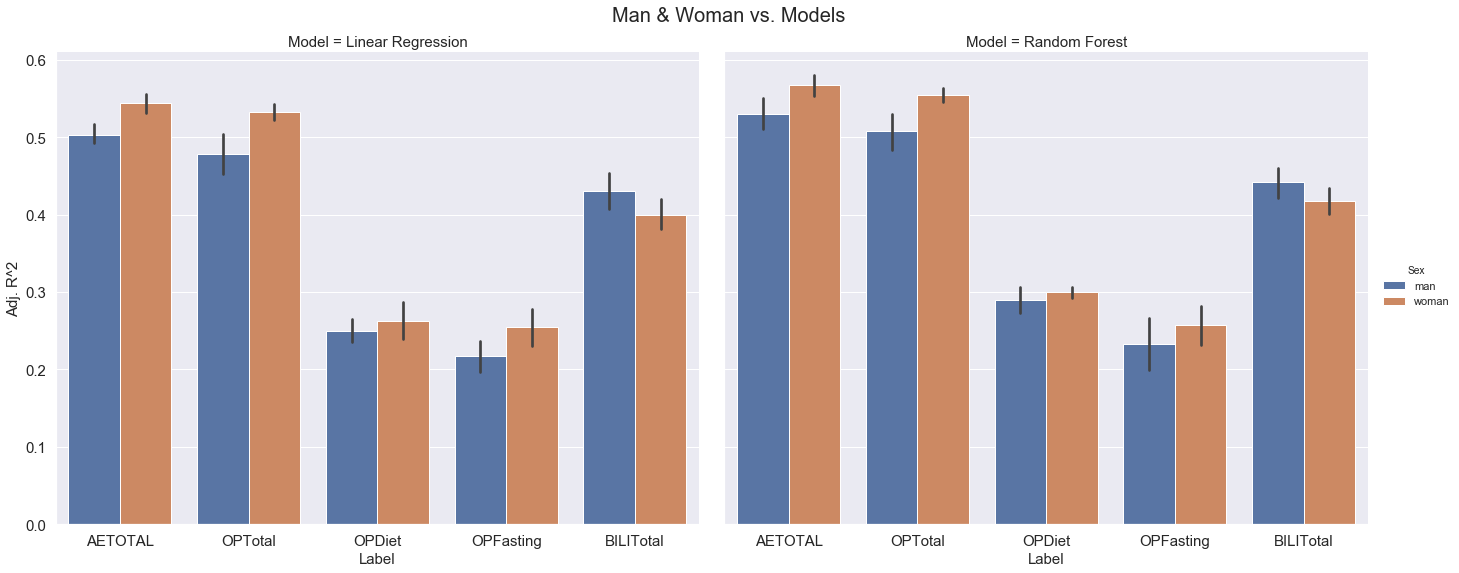

In [63]:
g = sns.catplot(x="Label", y="Adj. R^2", hue='Sex', col='Model', data=df_all_man_woman, kind="bar", height=8., aspect=6/5)

ax1 = g.axes[0,0]
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(15)

ax2 = g.axes[0,1]
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(15)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Man & Woman vs. Models', fontsize=20)

g.savefig('man_woman_models.svg')


In [64]:
df_all_man_woman.columns

Index(['Adj. R^2', 'Label', 'Model', 'Sex'], dtype='object')

In [65]:
df_all_man_woman.head()

,Adj. R^2,Label,Model,Sex
0,0.491986,AETOTAL,Linear Regression,man
1,0.510303,AETOTAL,Linear Regression,man
2,0.493954,AETOTAL,Linear Regression,man
3,0.489419,AETOTAL,Linear Regression,man
4,0.505488,AETOTAL,Linear Regression,man


In [66]:
df_all_man_woman.loc[(df_all_man_woman['Sex']=='woman') & (df_all_man_woman['Label']=='OPDiet'), :]

,Adj. R^2,Label,Model,Sex
0,0.278511,OPDiet,Linear Regression,woman
1,0.272623,OPDiet,Linear Regression,woman
2,0.257505,OPDiet,Linear Regression,woman
3,0.227086,OPDiet,Linear Regression,woman
4,0.270304,OPDiet,Linear Regression,woman
5,0.295086,OPDiet,Linear Regression,woman
6,0.203866,OPDiet,Linear Regression,woman
7,0.228842,OPDiet,Linear Regression,woman
8,0.257163,OPDiet,Linear Regression,woman
9,0.338593,OPDiet,Linear Regression,woman
